In [4]:
Threads.nthreads()

20

In [5]:
Threads.threadid()

1

In [10]:
Threads.@threads for i in 1:Threads.nthreads()
    println("i: ", i, "\t Thread ID: ", Threads.threadid())
end

i: 16	 Thread ID: 1


i: 11	 Thread ID: 19


i: 13

	 Thread ID: 20


i: 15	 Thread ID: 14
i: 2	 Thread ID: 12


i: 1	 Thread ID: 5
i: 3	 Thread ID: 11
i: 17	 Thread ID: 4
i: 14	 Thread ID: 10
i: 5	 Thread ID: 9
i: 20	 Thread ID: 18
i: 12	 Thread ID: 8
i: 6	 Thread ID: 7
i: 8	 Thread ID: 2
i: 18	 Thread ID: 15


i: 10	 Thread ID: 6
i: 4	 Thread ID: 3
i: 7	 Thread ID: 13
i: 9	 Thread ID: 16
i: 19	 Thread ID: 17


In [3]:
using LinearAlgebra, Plots

In [4]:
# Params = [alpha, beta, gamma, delta, n_k, A]
Params = Vector{Float64}([0.33, 0.9, 1, 1, 10])

5-element Vector{Float64}:
  0.33
  0.9
  1.0
  1.0
 10.0

In [5]:
function utility(c, P)
    if P[3] == 1
        return log(c)
    else
        return (c^(1-P[3]))/(1-P[3])
    end
end

utility (generic function with 1 method)

In [6]:
function utils(c, P)
    if (P[3] == 1)
        return log.(c) 
    else
        return (c.^(1-P[3]))./(1-P[3])
    end
end

utils (generic function with 1 method)

In [7]:
function Bellman_VFI(P, tolerance, max_iterations, grid_size)

    grid = LinRange(0.1,100,grid_size)

    v = zeros(grid_size,1)

    v1 = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    distance = zeros(grid_size,1)

    iter = 0

    error = tolerance + 1

    if iter == 0
        println("Iterating...")
    end

    while ((tolerance < error) && (iter < max_iterations))

        for i in 1:grid_size

            vmax = -Inf

            for j in 1:grid_size

                consumption = P[5] * grid[i]^P[1] + (1-P[4]) * grid[i] - grid[j]

                if consumption >= 0

                    v_temp = utility(consumption, P) + P[2] * v[j]

                    if v_temp > vmax

                        vmax = v_temp

                        policy[i] = grid[j]

                    end

                end

            end

            v1[i] = vmax
        
            distance[i] = v1[i] - v[i]

        end

        
    error = maximum(distance)

    if isinteger(iter/25) == true
        println("iteration $iter completed with error $error")
    end

    v .= v1

    iter +=1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end

Bellman_VFI (generic function with 1 method)

Iterating...
iteration 0 completed with error 3.820101096099539


iteration 25 completed with error 0.17558797317516905


iteration 50 completed with error 0.012605425260538539


iteration 75 completed with error 0.0009049409428598665


iteration 100 completed with error 6.496552819612589e-5


iteration 125 completed with error 4.66386219954984e-6

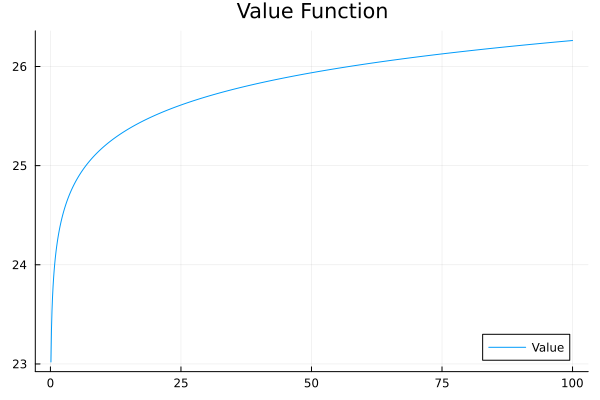

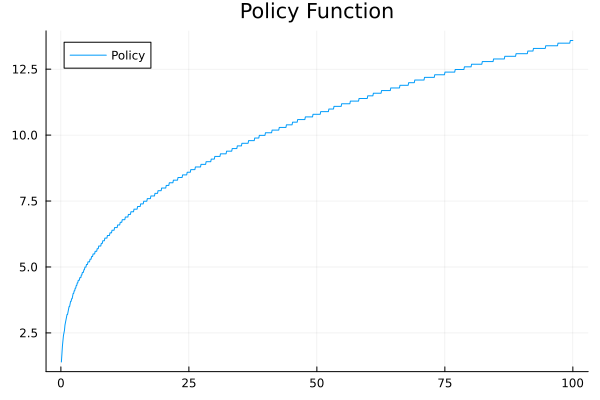


converged in 141 iterations


  6.633349 seconds (2.77 M allocations: 184.611 MiB, 0.57% gc time, 28.60% compilation time: 27% of which was recompilation)


([23.019819797414733; 23.344738679077906; … ; 26.26198145880238; 26.26245083369731;;], [1.3987; 1.6984000000000001; … ; 13.5865; 13.5865;;])

In [8]:
@time begin
    v_out, pol_out = Bellman_VFI(Params, 1e-6, 10000, 1001)
end

In [9]:
function vectorised_Bellman_VFI(P, tolerance, max_iterations, grid_size)

    grid = LinRange(0.1,100,grid_size)

    grid = reshape(grid, (grid_size,1))

    v = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    iter = 0

    if iter == 0
        println("Iterating...")
    end

    error = tolerance + 1

    consumption = P[5] .* grid .^ P[1] + (1-P[4]) .* grid .- transpose(grid)

    while ((tolerance < error) && (iter < max_iterations))

        c_positive = consumption .> 0

        consumption_positive = consumption .* c_positive

        v_new = log.(consumption_positive) .+ (P[2] .* transpose(v))

        v_new[.!c_positive] .= -Inf

        vmax, vmax_indices = findmax(v_new, dims=2)
        
        index = getindex.(vmax_indices, [1 2])

        policy = grid[index[:,2]]

        error = maximum(vmax .- v)

        v .= vmax

        if isinteger(iter/25) == true
            println("iteration $iter completed with error $error")
        end
        
        iter += 1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end

vectorised_Bellman_VFI (generic function with 1 method)

Iterating...
iteration 0 completed with error 3.820101096099539


iteration 25 completed with error 0.17558797317516905


iteration 50 completed with error 0.012605425260538539


iteration 75 completed with error 0.0009049409428598665


iteration 100 completed with error 6.496552819612589e-5


iteration 125 completed with error 4.66386219954984e-6


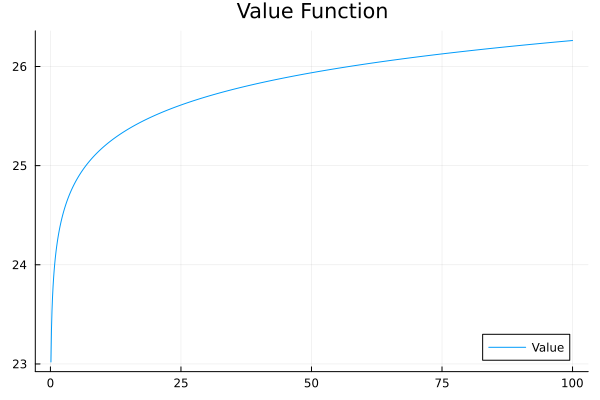

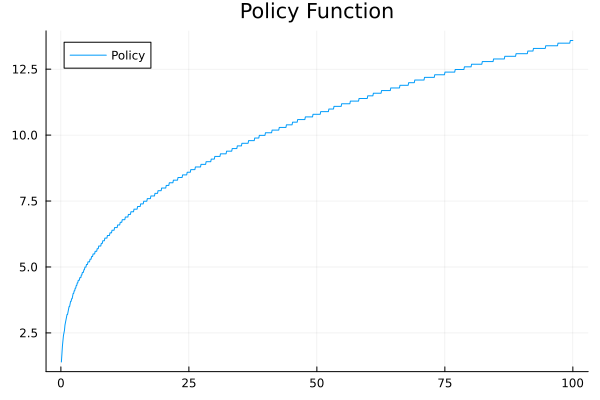

converged in 141 iterations
  1.872020 seconds (201.69 k allocations: 2.852 GiB, 7.79% gc time)


([23.019819797414733; 23.344738679077906; … ; 26.26198145880238; 26.26245083369731;;], [1.3987, 1.6984000000000001, 1.9981, 2.1979, 2.3977, 2.4976, 2.5975, 2.7973000000000003, 2.8972, 2.9971000000000005  …  13.486600000000001, 13.486600000000001, 13.486600000000001, 13.486600000000001, 13.5865, 13.5865, 13.5865, 13.5865, 13.5865, 13.5865])

In [11]:
@time begin
    vec_v, vec_pol = vectorised_Bellman_VFI(Params, 1e-6, 10000000, 1001)
end

In [12]:
function Bellman_VFI_mqp(P, tolerance, max_iterations, grid_size)

    grid = LinRange(0.1,100,grid_size)

    v = zeros(grid_size,1)

    v1 = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    distance = zeros(grid_size,1)

    iter = 0

    error = tolerance + 1

    if iter == 0
        println("Iterating...")
    end

    while ((tolerance < error) && (iter < max_iterations))

        for i in 1:grid_size

            vmax = -Inf

            for j in 1:grid_size

                consumption = P[5] * grid[i]^P[1] + (1-P[4]) * grid[i] - grid[j]

                if consumption >= 0

                    v_temp = utility(consumption, P) + P[2] * v[j]

                    if v_temp > vmax

                        vmax = v_temp

                        policy[i] = grid[j]

                    end

                end

            end

            v1[i] = vmax
        
            distance[i] = v1[i] - v[i]

        end

    c_low = minimum(v1 .- v) .* (P[2] / (1 - P[2]))
    
    c_high = maximum(v1 .- v) .* (P[2] / (1 - P[2]))

    error = c_high - c_low

    if isinteger(iter/25) == true
        println("iteration $iter completed with error $error")
    end

    v .= v1 .+ (c_low + c_high)/2

    iter +=1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end

Bellman_VFI_mqp (generic function with 1 method)

Iterating...
iteration 0 completed with error 20.690825034444718


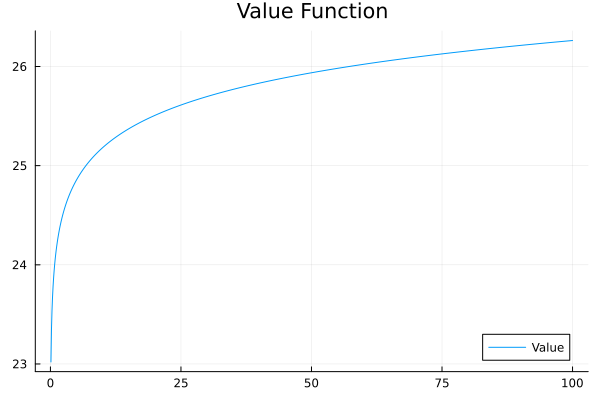

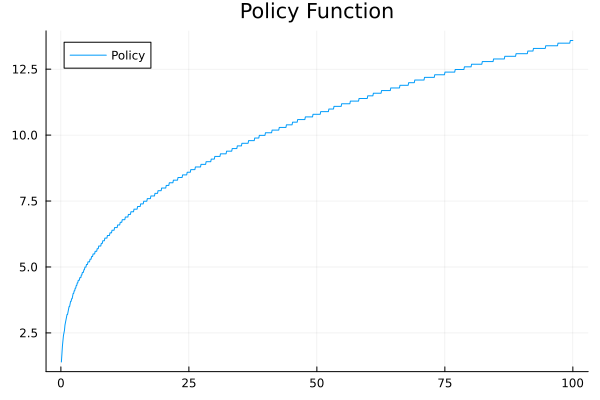

converged in 13 iterations
  0.457013 seconds (197.60 k allocations: 6.166 MiB)


([23.019828439645533; 23.344747321308713; … ; 26.26199010103318; 26.26245947592811;;], [1.3987; 1.6984000000000001; … ; 13.5865; 13.5865;;])

In [14]:
@time begin
    v_out_mqp, pol_out_mqp = Bellman_VFI_mqp(Params, 1e-6, 10000, 1001)
end

In [16]:
function vectorised_Bellman_VFI_mqp(P, tolerance, max_iterations, grid_size)

    grid = LinRange(0.1,100,grid_size)

    grid = reshape(grid, (grid_size,1))

    v = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    iter = 0

    if iter == 0
        println("Iterating...")
    end

    error = tolerance + 1

    consumption = P[5] .* grid .^ P[1] + (1-P[4]) .* grid .- transpose(grid)

    while ((tolerance < error) && (iter < max_iterations))

        c_positive = consumption .> 0

        consumption_positive = consumption .* c_positive

        v_new = log.(consumption_positive) .+ (P[2] .* transpose(v))

        v_new[.!c_positive] .= -Inf

        vmax, vmax_indices = findmax(v_new, dims=2)
        
        index = getindex.(vmax_indices, [1 2])

        policy = grid[index[:,2]]

        c_low = minimum(vmax .- v) .* (P[2] / (1 - P[2]))
    
        c_high = maximum(vmax .- v) .* (P[2] / (1 - P[2]))
    
        error = c_high - c_low

        v .= vmax .+ (c_low + c_high)/2

        if isinteger(iter/25) == true
            println("iteration $iter completed with error $error")
        end
        
        iter += 1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end

vectorised_Bellman_VFI_mqp (generic function with 1 method)

Iterating...
iteration 0 completed with error 20.690825034444718

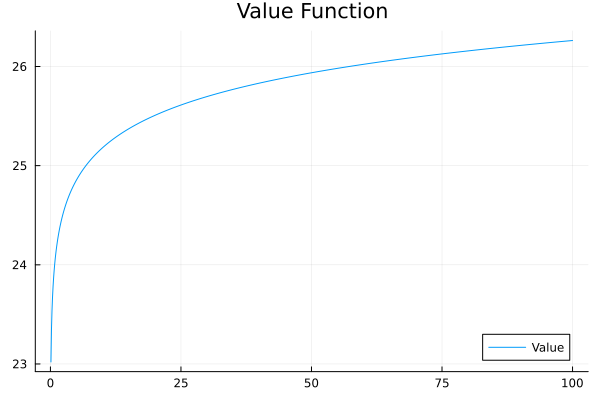

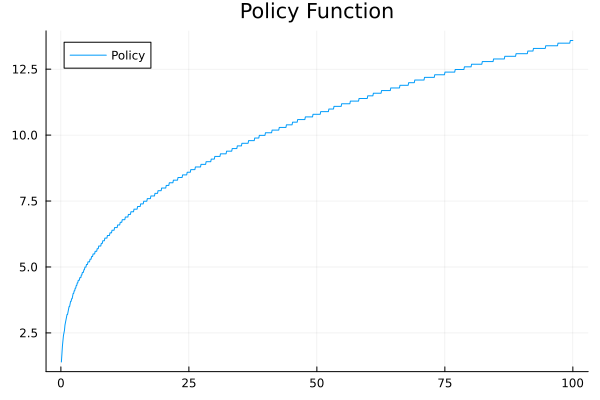


converged in 13 iterations
  0.253594 seconds (197.93 k allocations: 281.780 MiB, 5.65% gc time)


([23.019828439645533; 23.344747321308713; … ; 26.26199010103318; 26.26245947592811;;], [1.3987, 1.6984000000000001, 1.9981, 2.1979, 2.3977, 2.4976, 2.5975, 2.7973000000000003, 2.8972, 2.9971000000000005  …  13.486600000000001, 13.486600000000001, 13.486600000000001, 13.486600000000001, 13.5865, 13.5865, 13.5865, 13.5865, 13.5865, 13.5865])

In [18]:
@time begin
    v_vec_mqp, pol_vec_mqp = vectorised_Bellman_VFI_mqp(Params, 1e-6, 10000, 1001)
end

In [27]:
function Bellman_VFI_howard(P, tolerance, max_iterations, grid_size, m)

    grid = LinRange(0.1,100,grid_size)

    v = zeros(grid_size,1)

    v1 = zeros(grid_size,1)

    v2 = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    distance = zeros(grid_size,1)

    idx = zeros(Int, grid_size,1)

    iter = 0

    error = tolerance + 1

    if iter == 0
        println("Iterating...")
    end

    while ((tolerance < error) && (iter < max_iterations))

        for i in 1:grid_size

            vmax = -Inf

            for j in 1:grid_size

                consumption = P[5] * grid[i]^P[1] + (1-P[4]) * grid[i] - grid[j]

                if consumption >= 0

                    v_temp = utility(consumption, P) + P[2] * v[j]

                    if v_temp > vmax

                        vmax = v_temp

                        policy[i] = grid[j]

                        idx[i] = j

                    end

                end

            end

            v1[i] = vmax

        end

        for _ in 1:m

            for i in 1:grid_size

                j = idx[i]

                c = P[5] * grid[i]^P[1] + (1-P[4]) * grid[i] - policy[i]

                v2[i] = utility(c, P) + P[2] * v1[j]
            
            v1 .= v2

            end
        
        end

    error = maximum(v2 .- v)

    if isinteger(iter/25) == true
        println("iteration $iter completed with error $error")
    end

    v .= v1

    iter +=1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end


Bellman_VFI_howard (generic function with 1 method)

Iterating...


iteration 0 completed with error 17.446685868743923


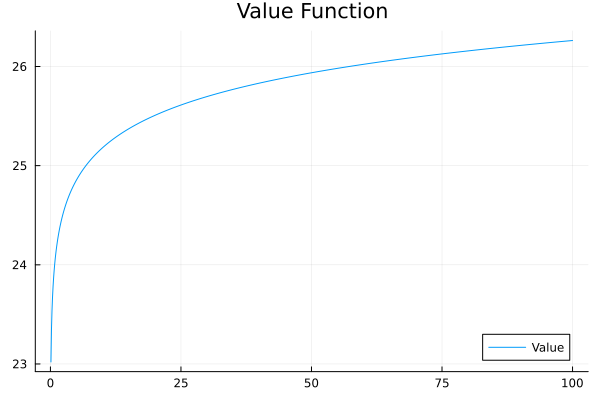

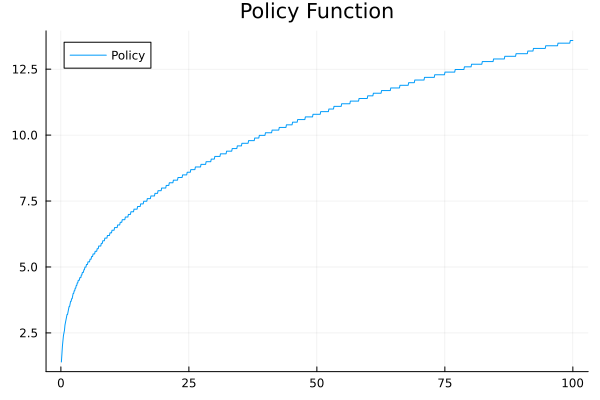

converged in 9 iterations
  0.409080 seconds (197.63 k allocations: 6.052 MiB)


([23.01982843964553; 23.344747321308706; … ; 26.261990101033177; 26.262459475928107;;], [1.3987; 1.6984000000000001; … ; 13.5865; 13.5865;;])

In [34]:
@time begin
    v_out_how, pol_out_how = Bellman_VFI_howard(Params, 1e-6, 10000, 1001, 50)
end

In [35]:
function vectorised_Bellman_VFI_howard(P, tolerance, max_iterations, grid_size, m)

    grid = LinRange(0.1,100,grid_size)

    grid = reshape(grid, (grid_size,1))

    v = zeros(grid_size,1)

    policy = zeros(grid_size,1)

    iter = 0

    if iter == 0
        println("Iterating...")
    end

    error = tolerance + 1

    consumption = P[5] .* grid .^ P[1] + (1-P[4]) .* grid .- transpose(grid)

    while ((tolerance < error) && (iter < max_iterations))

        c_positive = consumption .> 0

        consumption_positive = consumption .* c_positive

        v_new = log.(consumption_positive) .+ (P[2] .* transpose(v))

        v_new[.!c_positive] .= -Inf

        vmax, vmax_indices = findmax(v_new, dims=2)
        
        index = getindex.(vmax_indices, [1 2])

        policy = grid[index[:,2]]

        c_howard = P[5] .* grid .^ P[1] + (1-P[4]) .* grid .- policy

        for _ in 1:m

            v_howard = log.(c_howard) .+ (P[2] .* vmax)

            vmax .= v_howard
        
        end

        error = maximum(vmax .- v)

        v .= vmax

        if isinteger(iter/25) == true
            println("iteration $iter completed with error $error")
        end
        
        iter += 1

    end

    println("converged in $iter iterations")

    display(Plots.plot(grid, v, title="Value Function", label="Value"))
    
    display(Plots.plot(grid, policy, title="Policy Function", label="Policy"))

    return v, policy

end

vectorised_Bellman_VFI_howard (generic function with 1 method)

Iterating...

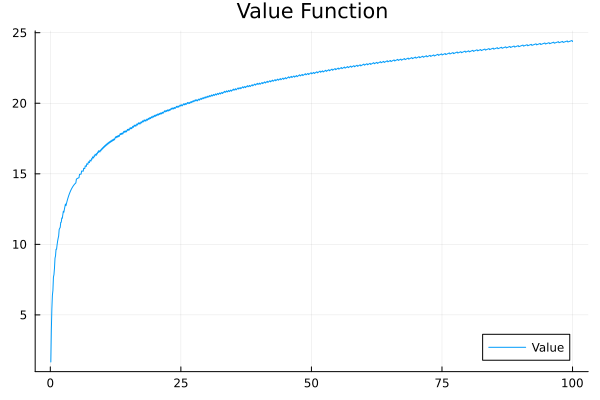

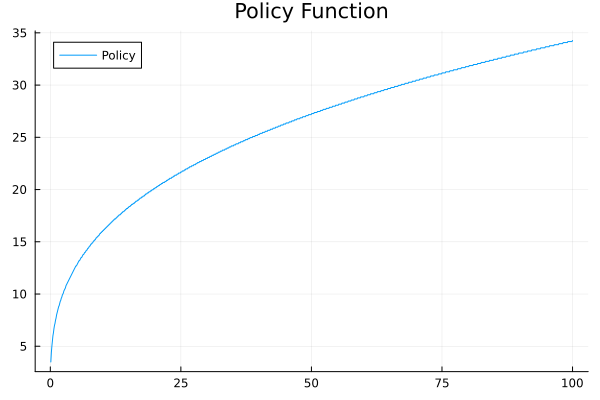


iteration 0 completed with error 38.20009775593439
converged in 2 iterations
  0.099316 seconds (199.51 k allocations: 56.715 MiB, 2.91% gc time)


([1.6621181320896181; 3.9400486437464464; … ; 24.447898022585115; 24.37404427457599;;], [3.4966000000000004, 4.3957, 4.995100000000001, 5.4946, 5.9940999999999995, 6.2938, 6.6934000000000005, 6.9931, 7.1929, 7.4925999999999995  …  34.1659, 34.1659, 34.1659, 34.1659, 34.1659, 34.1659, 34.1659, 34.1659, 34.1659, 34.265800000000006])

In [37]:
@time begin
    v_vec_how, pol_vec_how = vectorised_Bellman_VFI_howard(Params, 1e-6, 10000, 1001, 100)
end